Notebook 1 : Exploration


---


In [ ]:
# Imports principaux pour l'exploration

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path
from collections import Counter
import re

from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Options d'affichage pour mieux lire le texte et les floats
pd.set_option("display.max_colwidth", 200)
pd.set_option("display.float_format", "{:.4f}".format)

# Emplacement du fichier de données
DATA_PATH = Path("../data")
CSV_FILE = DATA_PATH / "training.1600000.processed.noemoticon.csv"

In [ ]:
col_names = ["target", "ids", "date", "flag", "user", "text"]

df = pd.read_csv(CSV_FILE, encoding="latin-1", header=None, names=col_names)

df.shape, df.head()

((1600000, 6),
    target         ids                          date      flag  \
 0       0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
 1       0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
 2       0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
 3       0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
 4       0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
 
               user  \
 0  _TheSpecialOne_   
 1    scotthamilton   
 2         mattycus   
 3          ElleCTF   
 4           Karoli   
 
                                                                                                                   text  
 0  @switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D  
 1      is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!  
 2                            @Kenichan I dived many times for the ball. Managed 

In [ ]:
df.info()
df.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


,target,ids,date,flag,user,text
996953,4,1835988903,Mon May 18 07:09:19 PDT 2009,NO_QUERY,lmyers7638,"stayed up too late last night but it was worth it work til 4, Xpose til 6, gym with Jeffrey then pizza night!!"
316743,0,2002467932,Tue Jun 02 04:18:06 PDT 2009,NO_QUERY,alannahrosecard,"goodness, what have I missed, have been out all day, inbox is full, twitter box is 150 tweets, no time to read"
519071,0,2191701169,Tue Jun 16 05:48:27 PDT 2009,NO_QUERY,Donae,"In other news, it's so hot outside!!!"
97129,0,1792859371,Thu May 14 00:29:44 PDT 2009,NO_QUERY,ally_carlyle,found dana's gi! but now i have to wash two complete ones drying is gonna be a pain in the ass. thats what i get for being forgetful
119468,0,1828045568,Sun May 17 11:58:49 PDT 2009,NO_QUERY,willemw_be,"My head, it hurts"


In [ ]:
df["target"].value_counts()
df["target"].value_counts(normalize=True) * 100

target
0   50.0000
4   50.0000
Name: proportion, dtype: float64

In [ ]:
label_mapping = {0: "negative", 4: "positive"}
df["sentiment"] = df["target"].map(label_mapping)

df["label"] = (df["target"] == 4).astype(int)

df[["target", "label", "sentiment"]].head(15)

,target,label,sentiment
0,0,0,negative
1,0,0,negative
2,0,0,negative
3,0,0,negative
4,0,0,negative
5,0,0,negative
6,0,0,negative
7,0,0,negative
8,0,0,negative
9,0,0,negative


In [ ]:
df.isna().sum()

target       0
ids          0
date         0
flag         0
user         0
text         0
sentiment    0
label        0
dtype: int64

In [ ]:
dup_text = df.duplicated(subset=["text"]).sum()
dup_full = df.duplicated().sum()
dup_text, dup_full

(np.int64(18534), np.int64(0))

In [ ]:
df = df.drop_duplicates(subset=["text"]).reset_index(drop=True)
df.shape

(1581466, 8)

In [ ]:
label_counts = df["sentiment"].value_counts()
label_counts

sentiment
positive    791281
negative    790185
Name: count, dtype: int64

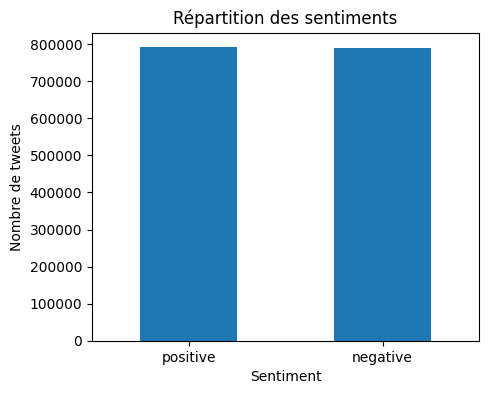

In [ ]:
plt.figure(figsize=(5, 4))
label_counts.plot(kind="bar")
plt.title("Répartition des sentiments")
plt.xlabel("Sentiment")
plt.ylabel("Nombre de tweets")
plt.xticks(rotation=0)
plt.show()

In [ ]:
top_users = df["user"].value_counts().head(20)
top_users

user
lost_dog           549
webwoke            341
SallytheShizzle    281
VioletsCRUK        279
mcraddictal        274
tsarnick           248
what_bugs_u        246
Karen230683        237
DarkPiano          234
SongoftheOss       227
Jayme1988          220
keza34             219
ramdomthoughts     215
shanajaca          212
nuttychris         211
TraceyHewins       210
thisgoeshere       207
Spidersamm         205
StDAY              202
felicityfuller     195
Name: count, dtype: int64

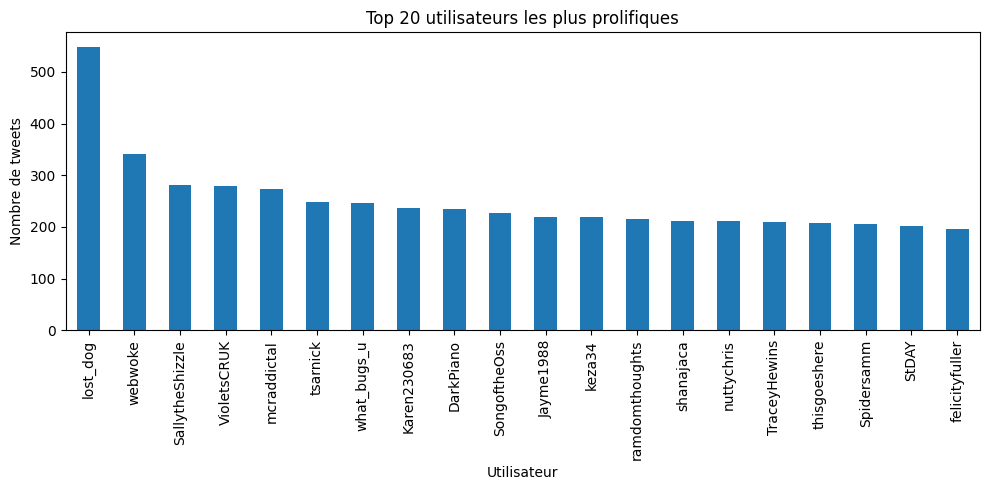

In [ ]:
plt.figure(figsize=(10, 5))
top_users.plot(kind="bar")
plt.title("Top 20 utilisateurs les plus prolifiques")
plt.xlabel("Utilisateur")
plt.ylabel("Nombre de tweets")
plt.tight_layout()
plt.show()

In [ ]:
df["date_parsed"] = pd.to_datetime(df["date"], errors="coerce")
df["date_parsed"].describe()

C:\Users\Gui\AppData\Local\Temp\ipykernel_19856\3869815116.py:1: FutureWarning: Parsed string "Mon Apr 06 22:19:45 PDT 2009" included an un-recognized timezone "PDT". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  df["date_parsed"] = pd.to_datetime(df["date"], errors="coerce")


count                          1581466
mean     2009-05-31 06:47:23.837275392
min                2009-04-06 22:19:45
25%                2009-05-28 22:52:40
50%         2009-06-02 02:53:37.500000
75%                2009-06-15 05:10:47
max                2009-06-25 10:28:31
Name: date_parsed, dtype: object

In [ ]:
df["date_parsed"].isna().mean() * 100

np.float64(0.0)

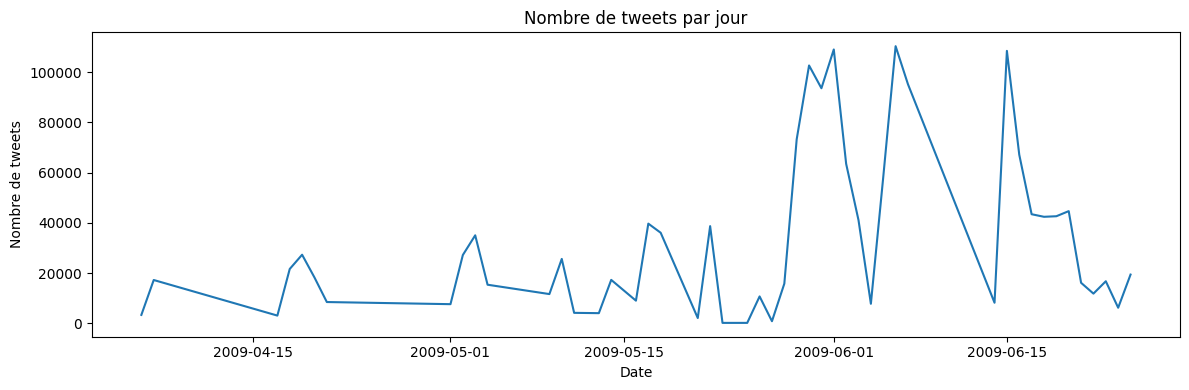

In [ ]:
tweets_per_day = df.groupby(df["date_parsed"].dt.date).size()

plt.figure(figsize=(12, 4))
tweets_per_day.plot()
plt.title("Nombre de tweets par jour")
plt.xlabel("Date")
plt.ylabel("Nombre de tweets")
plt.tight_layout()
plt.show()

In [ ]:
tweets_per_day_sent = (
    df.groupby([df["date_parsed"].dt.date, "sentiment"]).size().unstack()
)

tweets_per_day_sent.tail()

sentiment,negative,positive
date_parsed,,
2009-06-21,16125.0000,NaN
2009-06-22,11817.0000,NaN
2009-06-23,16740.0000,NaN
2009-06-24,6197.0000,NaN
2009-06-25,19392.0000,NaN


In [ ]:
df["len_chars"] = df["text"].str.len()
df["len_words"] = df["text"].str.split().apply(len)

df[["len_chars", "len_words"]].describe()

,len_chars,len_words
count,1581466.0000,1581466.0000
mean,74.4757,13.2463
std,36.2079,6.9249
min,6.0000,1.0000
25%,44.0000,7.0000
50%,70.0000,12.0000
75%,104.0000,19.0000
max,374.0000,64.0000


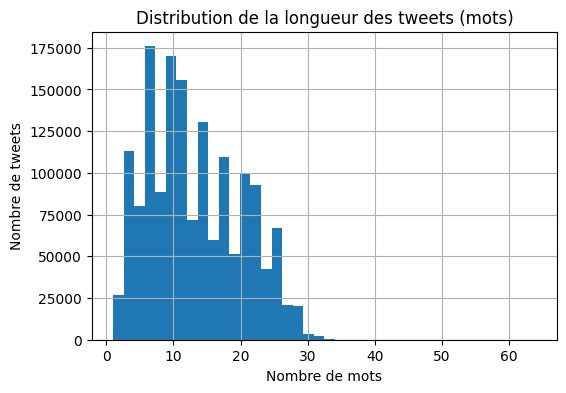

In [ ]:
plt.figure(figsize=(6, 4))
df["len_words"].hist(bins=40)
plt.title("Distribution de la longueur des tweets (mots)")
plt.xlabel("Nombre de mots")
plt.ylabel("Nombre de tweets")
plt.show()

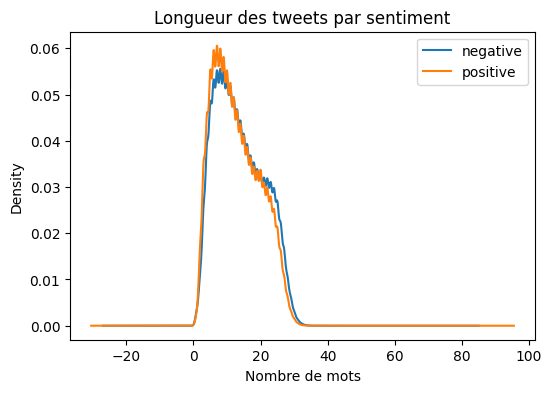

In [ ]:
plt.figure(figsize=(6, 4))
for sent in df["sentiment"].unique():
    df[df["sentiment"] == sent]["len_words"].plot(kind="kde", label=sent)

plt.title("Longueur des tweets par sentiment")
plt.xlabel("Nombre de mots")
plt.legend()
plt.show()

In [ ]:
url_pattern = r"http\S+|www\.\S+"
mention_pattern = r"@\w+"
hashtag_pattern = r"#\w+"


def clean_text_basic(text: str) -> str:
    text = text.lower()
    text = re.sub(url_pattern, " ", text)
    text = re.sub(mention_pattern, " ", text)
    text = re.sub("#", " ", text)
    text = re.sub(r"[^a-z0-9\s]", " ", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text


df["text_clean"] = df["text"].astype(str).apply(clean_text_basic)
df[["text", "text_clean"]].sample(5)

,text,text_clean
71067,i think im gonna wear my Camp Rock t-shirt later for luck.. we'll go to the dentist. im scared,i think im gonna wear my camp rock t shirt later for luck we ll go to the dentist im scared
331646,@hales23...why do you keep saying hella to me...that makes me more sad than if you where to die hahaha,why do you keep saying hella to me that makes me more sad than if you where to die hahaha
840090,is sitting out in the sun with a nice glass of wine...happy days x,is sitting out in the sun with a nice glass of wine happy days x
421405,is really disappointed that he is gonna miss the french open finals today History is to be made in 6 hrs.,is really disappointed that he is gonna miss the french open finals today history is to be made in 6 hrs
177982,@Ur_Obsession lol but its only gonna be 80 the water will prob be cold as heck...,lol but its only gonna be 80 the water will prob be cold as heck


In [ ]:
def tokenize(text: str):
    return text.split()


df["tokens"] = df["text_clean"].apply(tokenize)
df["tokens"].head()

0                                           [awww, that, s, a, bummer, you, shoulda, got, david, carr, of, third, day, to, do, it, d]
1    [is, upset, that, he, can, t, update, his, facebook, by, texting, it, and, might, cry, as, a, result, school, today, also, blah]
2                                      [i, dived, many, times, for, the, ball, managed, to, save, 50, the, rest, go, out, of, bounds]
3                                                                           [my, whole, body, feels, itchy, and, like, its, on, fire]
4                    [no, it, s, not, behaving, at, all, i, m, mad, why, am, i, here, because, i, can, t, see, you, all, over, there]
Name: tokens, dtype: object

In [ ]:
all_tokens = [token for tokens in df["tokens"] for token in tokens]
vocab = set(all_tokens)
len(vocab)

280431

In [ ]:
sample_size = 200_000
df_sample = df.sample(sample_size, random_state=42)

all_tokens_sample = [token for tokens in df_sample["tokens"] for token in tokens]
counter_all = Counter(all_tokens_sample)

counter_all.most_common(30)

[('i', 119851),
 ('to', 70818),
 ('the', 65771),
 ('a', 48189),
 ('my', 39601),
 ('it', 38562),
 ('and', 38037),
 ('you', 37881),
 ('is', 29455),
 ('in', 27297),
 ('for', 26959),
 ('s', 23535),
 ('of', 23200),
 ('t', 22911),
 ('on', 21158),
 ('that', 20774),
 ('me', 20555),
 ('so', 19328),
 ('have', 18241),
 ('m', 17223),
 ('but', 16686),
 ('just', 15876),
 ('with', 14419),
 ('be', 14341),
 ('at', 14004),
 ('not', 13631),
 ('was', 13254),
 ('this', 11954),
 ('now', 11795),
 ('can', 11772)]

In [ ]:
stopwords = set(ENGLISH_STOP_WORDS)

counter_no_stop = Counter(
    token for token in all_tokens_sample if token not in stopwords and len(token) > 2
)

counter_no_stop.most_common(30)

[('just', 15876),
 ('good', 11432),
 ('day', 10859),
 ('like', 9896),
 ('quot', 9047),
 ('today', 8610),
 ('love', 8142),
 ('going', 8044),
 ('work', 8025),
 ('got', 7613),
 ('lol', 7392),
 ('time', 7168),
 ('know', 6643),
 ('don', 6291),
 ('really', 6214),
 ('amp', 6151),
 ('night', 5513),
 ('new', 5416),
 ('think', 5352),
 ('thanks', 5202),
 ('want', 5181),
 ('home', 5003),
 ('need', 4573),
 ('miss', 4512),
 ('morning', 4364),
 ('hope', 4234),
 ('great', 4233),
 ('tomorrow', 4193),
 ('twitter', 4056),
 ('haha', 4030)]

In [ ]:
def top_words_by_sentiment(df, sentiment, n=20):
    tokens = [
        token
        for tokens in df[df["sentiment"] == sentiment]["tokens"]
        for token in tokens
    ]
    counter = Counter(t for t in tokens if t not in stopwords and len(t) > 2)
    return counter.most_common(n)


top_neg = top_words_by_sentiment(df_sample, "negative", 20)
top_pos = top_words_by_sentiment(df_sample, "positive", 20)

top_neg, top_pos

([('just', 7929),
  ('work', 5569),
  ('like', 5059),
  ('day', 5031),
  ('today', 4897),
  ('got', 4177),
  ('going', 4134),
  ('don', 4112),
  ('really', 3866),
  ('miss', 3821),
  ('want', 3724),
  ('good', 3599),
  ('sad', 3513),
  ('time', 3377),
  ('know', 3330),
  ('quot', 3226),
  ('home', 3027),
  ('need', 2901),
  ('lol', 2884),
  ('amp', 2844)],
 [('just', 7947),
  ('good', 7833),
  ('love', 5975),
  ('day', 5828),
  ('quot', 5821),
  ('like', 4837),
  ('lol', 4508),
  ('thanks', 4479),
  ('going', 3910),
  ('time', 3791),
  ('today', 3713),
  ('got', 3436),
  ('new', 3410),
  ('know', 3313),
  ('amp', 3307),
  ('great', 3205),
  ('night', 3036),
  ('haha', 2770),
  ('happy', 2587),
  ('morning', 2586)])

In [ ]:
def extract_hashtags(text):
    return re.findall(r"#\w+", text)


def extract_mentions(text):
    return re.findall(r"@\w+", text)


df_sample["hashtags"] = df_sample["text"].apply(extract_hashtags)
df_sample["mentions"] = df_sample["text"].apply(extract_mentions)

all_hashtags = [h.lower() for hs in df_sample["hashtags"] for h in hs]
all_mentions = [m.lower() for ms in df_sample["mentions"] for m in ms]

Counter(all_hashtags).most_common(30)
Counter(all_mentions).most_common(30)

[('@mileycyrus', 580),
 ('@tommcfly', 464),
 ('@ddlovato', 448),
 ('@jonasbrothers', 298),
 ('@donniewahlberg', 177),
 ('@davidarchie', 175),
 ('@jonathanrknight', 156),
 ('@jordanknight', 136),
 ('@mitchelmusso', 131),
 ('@taylorswift13', 123),
 ('@selenagomez', 99),
 ('@dannymcfly', 96),
 ('@dougiemcfly', 91),
 ('@aplusk', 83),
 ('@joeymcintyre', 71),
 ('@tomfelton', 68),
 ('@shaundiviney', 67),
 ('@youngq', 66),
 ('@peterfacinelli', 64),
 ('@songzyuuup', 58),
 ('@tracecyrus', 58),
 ('@perezhilton', 56),
 ('@officialtila', 55),
 ('@wossy', 55),
 ('@alexalltimelow', 55),
 ('@therealjordin', 55),
 ('@gfalcone601', 54),
 ('@pink', 54),
 ('@jackalltimelow', 50),
 ('@kimkardashian', 49)]

In [ ]:
def generate_ngrams(tokens_list, n=2):
    ngrams = []
    for tokens in tokens_list:
        if len(tokens) >= n:
            ngrams.extend(zip(*[tokens[i:] for i in range(n)]))
    return ngrams


def top_ngrams(df, sentiment=None, n=2, top_k=20):
    if sentiment is not None:
        tokens_list = df[df["sentiment"] == sentiment]["tokens"]
    else:
        tokens_list = df["tokens"]

    ngrams = generate_ngrams(tokens_list, n=n)
    counter = Counter(
        ng for ng in ngrams if not any(t in stopwords or len(t) <= 2 for t in ng)
    )
    return counter.most_common(top_k)


top_bi_neg = top_ngrams(df_sample, "negative", n=2, top_k=20)
top_bi_pos = top_ngrams(df_sample, "positive", n=2, top_k=20)

top_bi_neg, top_bi_pos

([(('just', 'got'), 698),
  (('feel', 'like'), 613),
  (('looks', 'like'), 383),
  (('looking', 'forward'), 274),
  (('feel', 'better'), 264),
  (('getting', 'ready'), 235),
  (('good', 'morning'), 221),
  (('dont', 'know'), 218),
  (('work', 'today'), 214),
  (('really', 'want'), 196),
  (('work', 'tomorrow'), 192),
  (('just', 'woke'), 190),
  (('gonna', 'miss'), 190),
  (('feels', 'like'), 185),
  (('dont', 'want'), 183),
  (('got', 'home'), 171),
  (('just', 'saw'), 170),
  (('just', 'finished'), 154),
  (('really', 'really'), 152),
  (('ice', 'cream'), 146)],
 [(('good', 'morning'), 958),
  (('just', 'got'), 697),
  (('good', 'luck'), 508),
  (('good', 'night'), 490),
  (('looking', 'forward'), 406),
  (('happy', 'birthday'), 396),
  (('great', 'day'), 374),
  (('good', 'day'), 360),
  (('getting', 'ready'), 338),
  (('sounds', 'like'), 272),
  (('just', 'finished'), 223),
  (('looks', 'like'), 214),
  (('feel', 'like'), 208),
  (('100', 'followers'), 193),
  (('day', 'using'), 18

In [ ]:
df[df["sentiment"] == "negative"][["sentiment", "len_words", "text"]].sample(
    10, random_state=0
)

,sentiment,len_words,text
254924,negative,8,homework Three projects is a lot of work!
599736,negative,21,"thought i just saw sara walking into the canteen, got excited thinking i wouldnt be a loner anymore....but it wasnt her"
658667,negative,3,ow my heeaad
715847,negative,10,@meimeinono you're not missing much tonight. show is a no-go
185961,negative,10,@gab_iii I'm totally jealous of your hat and your shirt
109342,negative,14,"mad because it's raining outside, which means i can't hit the open road today"
102144,negative,3,Throat's still hurtin'
429424,negative,13,@TynzBoomPow Serioussss :O then what are you going to do? Let it close?
447708,negative,11,"@KEENENwithnoKEL congrats, buddy! i was there! didn't see you afterwards though"
175799,negative,10,@jordanknight PS- Missed your tweets today!!! Guess I'm addicted too.


In [ ]:
df[df["sentiment"] == "positive"][["sentiment", "len_words", "text"]].sample(
    10, random_state=1
)

,sentiment,len_words,text
1256808,positive,3,@EyanJ okay hammer
1419676,positive,8,@teainthesun im excited to see you STRUT ITTTT
1035115,positive,16,"@mattmbr excellent, the world needs more truly British eccentrics. I bet he laughs after your conversations"
1581459,positive,1,@SCOOBY_GRITBOYS
1279993,positive,15,good morning! my peel pals @jaimehansen @Socaltrojan @RoleyKrazy13 @kscholl128 @ChristineVee @annpar look especially lovely today
1383449,positive,15,Offing the phone to reduce risks at SATs. I'm not nervous though wish me luck
973766,positive,5,@antscott Wow! Real career leap.
1534120,positive,9,Is doing the 'watch eric movies' trend. Gladiator anyone?
1496526,positive,4,"Got my answer, thanks"
1364769,positive,13,Two major blasts from the past peeps today on Twitter and Facebook. Fun.


In [ ]:
mask_long = df["len_words"] >= 5

df[(df["sentiment"] == "negative") & mask_long][
    ["sentiment", "len_words", "text"]
].sample(10, random_state=0)

,sentiment,len_words,text
333206,negative,6,no one visits me at work
680068,negative,17,@Ganga108 normally nothing - but 4 1/2 hrs of sleep will get me later in the day
72920,negative,13,Is up because he cannot sleep again. 1130p sleep time... 3am wake time
363460,negative,13,"Oh HELL naw, Twitter down for an hour of maintenance at 11PM?! WUT."
170377,negative,22,Headed to Parking Facilities to turn in permit renewal. Not being across from the breakroom means I check snailmail once a month.
365500,negative,18,@misscherryofsse Love u 2 Ererererer! Omg...I Miss Yall (tear) For The FIRST Time..I Partied Myself! It Was HORRIBLE
295207,negative,21,just finished seeing Harry Potter: The Experience and the level of detail in those movie props was insane. Photos were prohibited.
99990,negative,9,Rainy blah day. Anybody else having a sucky Thursday?
579707,negative,15,I have to do stupid dishes..I hate dishes GOSH! I love JB always and 4ever!
706803,negative,27,"This life of fan jealous with me mad that Â¬ Â¬ 'and I love him, love him or her of the two not MILEY DROP IT PLEASE"


In [ ]:
df[(df["sentiment"] == "positive") & mask_long][
    ["sentiment", "len_words", "text"]
].sample(10, random_state=1)

,sentiment,len_words,text
821088,positive,10,@samanthaw80 im done this tuesday hang out next week yoo.
970772,positive,16,@cocotteloup Thank you.. Its much appreciated.. This time next week and It will all be over
1194874,positive,12,"@EmilyLatka Well if that's the case, then we're both losers!!! ENJOY! http://bit.ly/15AsPx"
1580378,positive,7,@tracecyrus http://twitpic.com/7horz - This guitar is beautiful
1549402,positive,10,Heading to Walmart soon to buy JB's new cd &lt;3
1444265,positive,5,@David_Kelly Press Play out tomorrow!
1271127,positive,12,@gileslane thanks Giles...will take a look and maybe even purchase #CatalogueOfIdeas http://bit.ly/jxYLv
888178,positive,25,HAD AN AWESOME TIME! THX FOR ALLA DA PRESENTS! YOU GUYS ARE THE BESTEST BUDDIES EVUR! &lt;3 PS. they r in da pic n background
1406304,positive,11,YoVille is the perfect place to be on a quiet Saturday
1442628,positive,10,"good evening Philippines, hello World and hi to all Anipals..."


In [ ]:
df_short = df[(df["len_words"] <= 3) & (~df["text"].str.startswith("@"))]

df_short.sort_values("len_words", ascending=True)[
    ["len_words", "sentiment", "text"]
].head(10)

,len_words,sentiment,text
1428310,1,positive,Finially.
66370,1,negative,saddd...
66810,1,negative,finals!!!!
67415,1,negative,frustrated
1427474,1,positive,gooooooodnight.
1424327,1,positive,stickam.com
67894,1,negative,Raining
1424042,1,positive,chillin..
1422313,1,positive,chattin'..
68644,1,negative,headache!


In [ ]:
df_long = df[df["len_words"] >= 15]

df_long.sort_values("len_words", ascending=False)[
    ["len_words", "sentiment", "text"]
].head(10)

,len_words,sentiment,text
1067366,64,positive,? ? ? ? ? ? ? ?? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?Take that
1066870,58,positive,? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? twitterart
761011,57,negative,I'm so boreeeeed. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .I need internet.
455996,44,negative,Is the saddest zornes ever thanks to the magic ( : ( : ( : ( : ( : ( : ( : ( : ( : ( : ( : ( : ( : ( : ( : ( : ( : ...
994771,41,positive,"If E x N = 12, L + X = 4 and K-T = 1. What does W + M = ? Answer at Mensa from 26th. PM me if you want to know why i say 8 is the answer"
969840,41,positive,@ajayrochester DO IT DO IT DO IT DO IT DO IT DO IT DO IT DO IT DO IT DO IT DO IT DO IT DO IT DO IT DO IT DO IT DO IT DO IT DO IT DO IT
1571892,39,positive,4 I am high &amp; u can see. 4 I am lost &amp; u find me. 4 I am held &amp; u break free. Well I am am &amp; u can only wish to be of such a masterpiece.
959934,39,positive,Shout out 2 all my followers .. I got it . I got it. I got ya . I got u . I got us. I got twitta . I got boston winin game 7 . I'm lmao 2
108712,39,negative,"Who Am I Lying ! ? ! I Know , You Know , We All Know , My Ass Is Still Gonna Be Up . Hehe . My Ass Can't Sleep . I Need Help . For Real !"
1084711,39,positive,I'm blue Da ba dee da ba di da ba dee da ba di da ba dee da ba di da ba dee da ba di da ba dee da ba di the orginal is the only good one
